In [1]:
""" Form Google search urls for scraping """

GOOGLE_ORIG_URL = 'https://www.google.com/search?q=carbon+footprint'

page_amount = 11
GOOGLE_URLS = [GOOGLE_ORIG_URL + '&start=' + str(i*10) for i in range(0, page_amount)]
print(GOOGLE_URLS)

['https://www.google.com/search?q=carbon+footprint&start=0', 'https://www.google.com/search?q=carbon+footprint&start=10', 'https://www.google.com/search?q=carbon+footprint&start=20', 'https://www.google.com/search?q=carbon+footprint&start=30', 'https://www.google.com/search?q=carbon+footprint&start=40', 'https://www.google.com/search?q=carbon+footprint&start=50', 'https://www.google.com/search?q=carbon+footprint&start=60', 'https://www.google.com/search?q=carbon+footprint&start=70', 'https://www.google.com/search?q=carbon+footprint&start=80', 'https://www.google.com/search?q=carbon+footprint&start=90', 'https://www.google.com/search?q=carbon+footprint&start=100']


In [2]:
# How to scrape HTML documents from Terminal
# wget --referer="http://www.google.com" --user-agent="Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"   --header="Accept:text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5"   --header="Accept-Language: en-us,en;q=0.5"   --header="Accept-Encoding: gzip,deflate"   --header="Accept-Charset: ISO-8859-1,utf-8;q=0.7,*;q=0.7"   --header="Keep-Alive: 300" "$@" -q -O - https://www.google.com/search?q=carbon+footprint | gzip -dc > test.html


In [3]:
""" Scrape Google search results """

import requests

s = requests.Session()
s.headers = {
    "referer" : "http://www.google.com",
    "user-agent" : "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"
}

def get_response(url):
    resp = s.get(url)
    if resp.status_code != 200:
        print(resp.text)
        raise
    return resp

google_responses = [get_response(url) for url in GOOGLE_URLS]
print(google_responses)

[<Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>]


In [4]:
""" Parse scraped Google search results """

from bs4 import BeautifulSoup

def google_get_description(response):
    returnable=[]
    soup = BeautifulSoup(response.content, "html.parser")
    for s in soup.find_all("div", class_="g"):
        spans = s.find_all('span', class_=None)
        without_attrs = [s for s in spans if (s.attrs == {})]
        without_feedback = [s for s in without_attrs if 'Feedback' != s.text]
        without_cached = [s for s in without_feedback if 'Cached' != s.text]
        without_similar = [s for s in without_cached if 'Similar' != s.text]
        without_cachedsimilar = [s for s in without_similar if 'CachedSimilar' != s.text]
        for desc in without_cachedsimilar:
            desc_text = desc.text
            returnable.append(desc_text.replace('\xa0', ' '))
    return returnable

google_descriptions_of_pages = [google_get_description(res) for res in google_responses]

def flatten(t):
    return [item for sublist in t for item in sublist]

bs4_scraped_snippets = flatten(google_descriptions_of_pages)

print(*bs4_scraped_snippets, sep='\n')
# Possibly not usable data atm
# Although it doesn't cost anything to calc the metrics for this data also

Leading online carbon footprint calculation tools and information to help reduce and offset your emissions - for business and individuals.
Use the World's most popular online carbon footprint calculator, and it's FREE. Calculate your carbon emissions from Buildings, Cars, Flights and other ...
Leading online carbon footprint calculation tools and information to help reduce and offset your emissions - for business and individuals.
Use the World's most popular online carbon footprint calculator, and it's FREE. Calculate your carbon emissions from Buildings, Cars, Flights and other ...
A carbon footprint is the total greenhouse gas (GHG) emissions caused by an individual, event, organization, service, place or product, expressed as carbon ...
Today, the term “carbon footprint” is often used as shorthand for the amount of carbon (usually in tonnes) being emitted by an activity or organization. The ...
Many of our daily activities - such as using electricity, driving a car, or disposing of 

In [21]:
""" Manually scraped snippets """

import csv

# Manually scraped data
# Done 06.10.2021, Oulu Finland
# URL = https://www.google.com/search?q=carbon+footprint
# Selecting next page by clicking

with open('NLP_Carbon_Footprint_Google.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    manually_scraped_snippets = [row[2] for row in csv_reader] 
    print(*manually_scraped_snippets, sep='\n')
        

A carbon footprint is the total amount of greenhouse gases (including carbon dioxide and methane) that are generated by our actions. ... To have the best chance of avoiding a 2℃ rise in global temperatures, the average global carbon footprint per year needs to drop under 2 tons by 2050.
Leading online carbon footprint calculation tools and information to help reduce and offset your emissions - for business and individuals. Free calculators · ‎Calculate · ‎About Us · ‎Business Carbon Footprint...
Use the World's most popular online carbon footprint calculator, and it's FREE. Calculate your carbon emissions from Buildings, Cars, Flights and other ...
A carbon footprint is the total greenhouse gas (GHG) emissions caused by an individual, event, organization, service, place or product, expressed as carbon ... Background · ‎Measuring carbon footprints · ‎Causes · ‎Reducing carbon footprints
14.7.2016 — Many of our daily activities - such as using electricity, driving a car, or disposing of 

In [6]:
""" BBC scrape """

import re

BBC_ORIG_URL = 'https://www.bbc.co.uk/search?q=carbon+footprint'

page_amount = 11
BBC_URLS = [BBC_ORIG_URL + '&page=' + str(i) for i in range(1, page_amount)]
#print(BBC_URLS)

bbc_responses = [get_response(url) for url in BBC_URLS]

def get_bbc_heading(response):
    returnable = []
    soup = BeautifulSoup(response.content, "html.parser")
    regex = re.compile('.*-Promo.')
    for s in soup.find_all("a", {"class" : regex}):
        returnable.append(s.text)
    return returnable

def get_bbc_description(response):
    returnable = []
    soup = BeautifulSoup(response.content, "html.parser")
    regex = re.compile('.*-Paragraph.')
    for s in soup.find_all("p", {"class" : regex}):
        if '© 2021 BBC. The BBC is not responsible for the content of external sites. Read about our approach to external linking.' in s.text:
            continue
        returnable.append(s.text)
    return returnable

bbc_headings_of_pages = [get_bbc_heading(res) for res in bbc_responses]
bbc_scraped_headings = flatten(bbc_headings_of_pages)
print(*bbc_scraped_headings, sep='\n')
print(len(bbc_scraped_headings))

print('\n-----\n')

bbc_descriptions_of_pages = [get_bbc_description(res) for res in bbc_responses]
bbc_scraped_snippets = flatten(bbc_descriptions_of_pages)
print(*bbc_scraped_snippets, sep='\n')
print(len(bbc_scraped_snippets))


Clacton Airshow looks to reduce carbon footprint
Dani's House: Series 1: It's Not Easy Being Green
Horizon: 2021: Feast to Save the Planet
Countryfile: Offa's Dyke Path
Royal Institution Christmas Lectures: 2020: Planet Earth - A User's Guide: Up in the Air
Hayley Goes...: Series 2: Back to Nature
5 Minutes On: The Prince and The Planet - why action is needed now
5 Minutes On: The Prince and The Planet - why we need to act now
Newcastle's plastic grass sparks 'carbon footprint' row
Firms want help to measure their carbon footprint
Do consumers care about carbon footprint?
Farming Today: 19/08/21 - The carbon footprint of milk, Wheat harvest in Yorkshire
Landward: 2021: Episode 18
Shop Well for the Planet?: Series 1: Episode 2
Could planting giant trees offset a lifetime’s carbon footprint?
Prince Charles: I understand climate activists' anger
PM Highlights: Climate Clinic: How do I reduce my carbon footprint?
6 Minute English - 210802- Do consumers care about carbon footprint? MAP
Smar

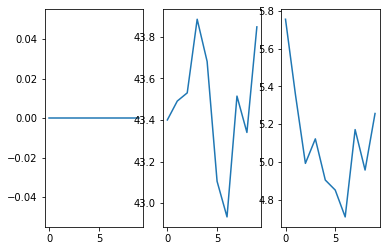

In [23]:
""" FuzzyWuzzy """

from fuzzywuzzy import fuzz
import itertools
import numpy as np
import matplotlib.pyplot as plt

def wuzzy_string_matching(i):
    score_list = []
    V1 = 0
    combs = itertools.combinations(range(0,i+10),2)
    for id1, id2 in combs:
        ratio = fuzz.ratio(manually_scraped_snippets[id1], manually_scraped_snippets[id2])
        # V1 corresponding to the total number of similar snippets (string matching score equals 100%)
        if ratio == 100:
            V1 += 1
        score_list.append(ratio)

    # V2 for the average string matching of all pairs
    V2 = np.average(score_list)
    # V3 for the standard deviation corresponding to this average value.
    V3 = np.std(score_list)

    return V1,V2,V3

V1_list = []
V2_list = []
V3_list = []

for i in range(10):
    V1, V2, V3 = wuzzy_string_matching(i)
    V1_list.append(V1)
    V2_list.append(V2)
    V3_list.append(V3)

plt.subplot(131)
plt.plot(V1_list)
plt.subplot(132)
plt.plot(V2_list)
plt.subplot(133)
plt.plot(V3_list)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


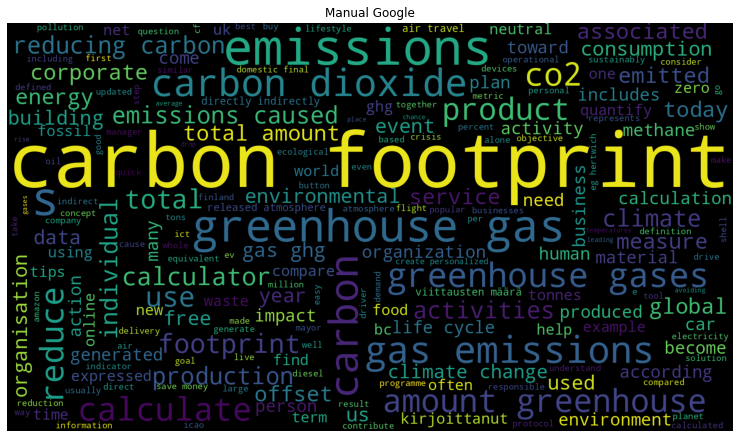

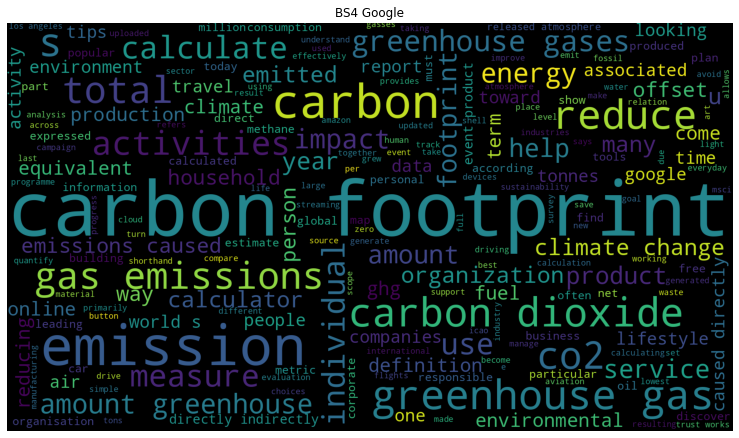

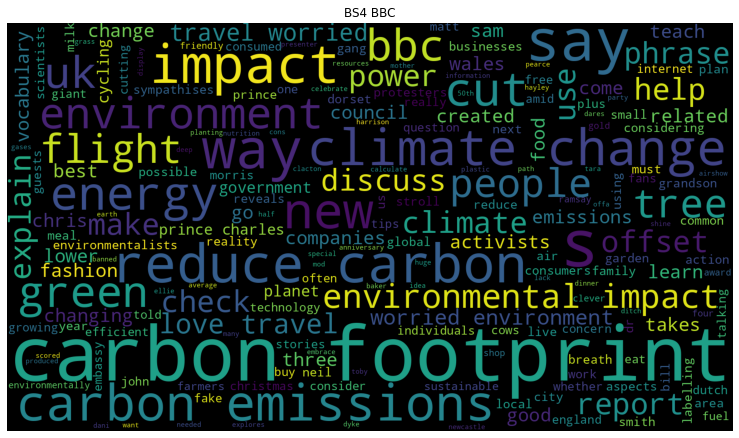

In [25]:
""" WordCloud """

import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

def preprocess(data):
    data = [item.lower() for item in data]
    stop_words = set(stopwords.words('english'))
    paragraph = ' '.join(data)
    word_tokens = word_tokenize(paragraph) 
    preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
    return preprocessed_data

def get_word_cloud(data, title):
    wordcloud = WordCloud(width=1600, height=900, max_font_size=200, background_color="black").generate(data)
    plt.figure(figsize=(13,11))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    return plt

manual_clean_data = preprocess(manually_scraped_snippets)
manual_plot = get_word_cloud(manual_clean_data, 'Manual Google')
manual_plot.show()

bs4_clean_data = preprocess(bs4_scraped_snippets)
bs4_plot = get_word_cloud(bs4_clean_data, 'BS4 Google')
bs4_plot.show()

bbc_clean_data = preprocess(bbc_scraped_snippets)
bbc_plot = get_word_cloud(bbc_clean_data, 'BS4 BBC')
bbc_plot.show()

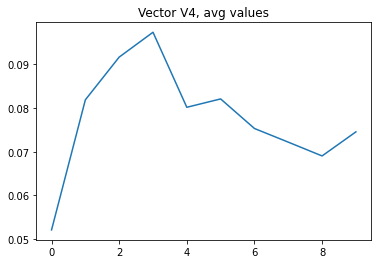

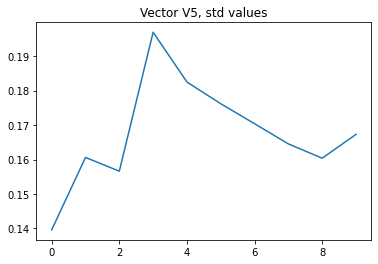

In [20]:
""" Sentiment analysis """

from textblob import TextBlob
import matplotlib.pyplot as plt
#print(manually_scraped_snippets[15])

temp = TextBlob(manually_scraped_snippets[0])

polarity = []

for snippet in manually_scraped_snippets:
    text_blob = TextBlob(snippet)
    for sentence in text_blob.sentences:
        temp = (sentence.sentiment.polarity)
    polarity.append(temp)

#vector V4, average values and vector V5 std values
V4 = []
V5 = []
for i in range (10,110,10):
    V4.append(np.average(polarity[0:i]))
    V5.append(np.std(polarity[0:i]))

plt.figure(1)
plt.plot(V4)
plt.title("Vector V4, avg values")
plt.show()

plt.figure(2)
plt.plot(V5)
plt.title("Vector V5, std values")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=df8df42c-8503-4bb3-8c9d-497cf36bf82c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>